In [19]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('donnes.csv', index_col='Code')

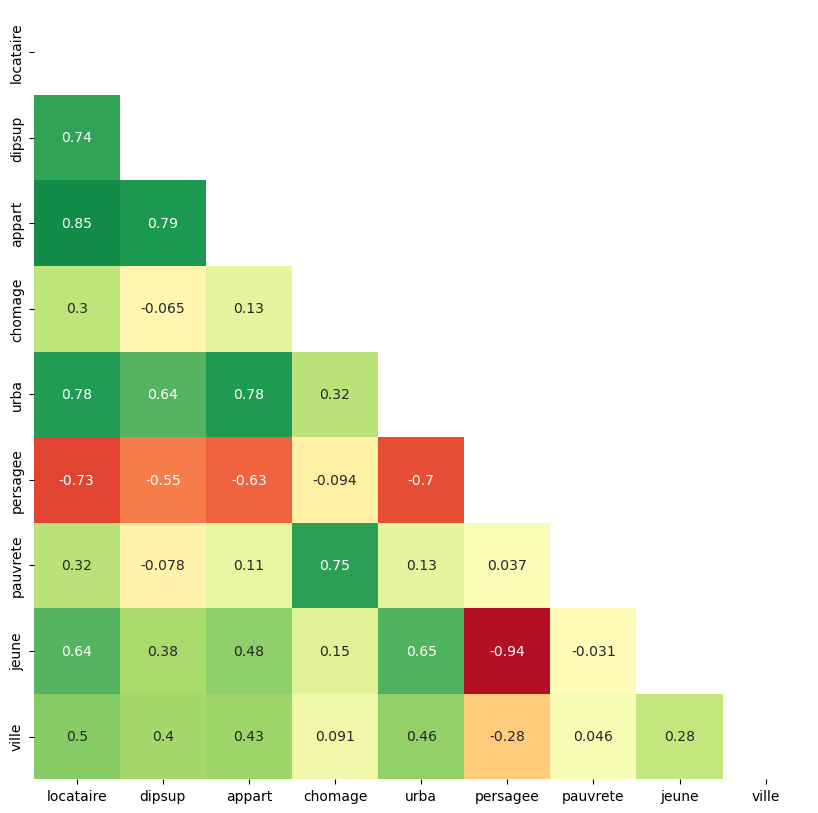

In [23]:
def corr_heatmap(_df):
    corr = _df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(10,10))
    
    ax = sns.heatmap(corr , cmap='RdYlGn', vmin=-1, vmax=1, center=0,mask=mask,
            annot=True, cbar=False)
            
    #plt.savefig('Diapo/img/corr.png', bbox_inches='tight', pad_inches=0)

corr_heatmap(df)

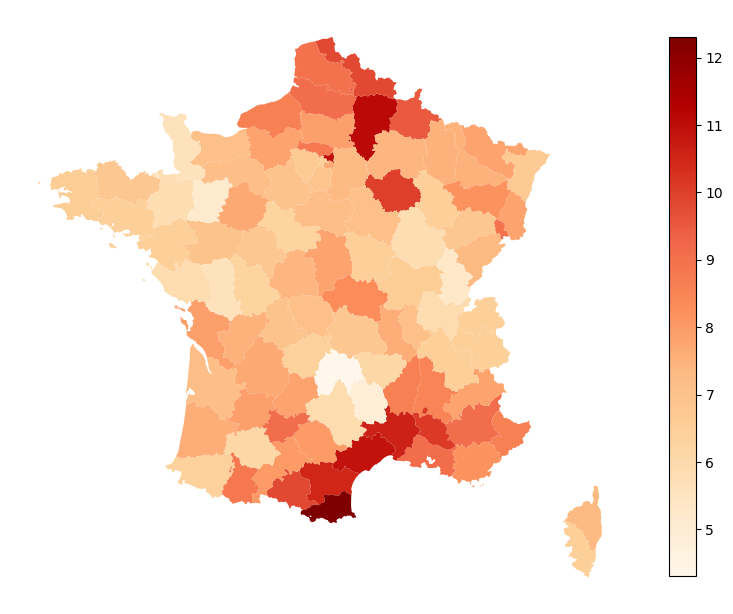

In [21]:
departements = gpd.read_file('departements-version-simplifiee.geojson')
gdf = departements.merge(df, left_on='code', right_on='Code')

def geo_heatmap(gdf, var, cb=True):
        fig, ax = plt.subplots(figsize=(10, 10))
        gdf.plot(var,
                ax=ax,
                cmap='OrRd',
                legend=cb,
                legend_kwds={'shrink':0.7, "fmt": "{:.0f}", 'location': "right"})
        plt.axis('off')
        #plt.savefig('Diapo/img/'+var+'.png', bbox_inches='tight', pad_inches=0)
        plt.show()

geo_heatmap(gdf, 'chomage')